In [1]:
!pip install pykrx

In [2]:
import datetime 

now = datetime.datetime.now()
today = now.strftime("%Y%m%d")
today

'20250904'

In [3]:
from pykrx import stock

df = stock.get_market_ohlcv_by_date("20151001", today, "229200")
df

c:\Users\edukd\miniconda3\envs\kiwoom-venv\Lib\site-packages\pykrx\__init__.py:4: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918
2015-10-05,10219,10229,10175,10196,43301,0.820726
2015-10-06,10212,10238,10137,10141,42543,-0.539427
2015-10-07,10059,10059,9913,9915,21396,-2.228577
...,...,...,...,...,...,...
2025-08-29,13390,13470,13220,13260,7213927,-0.562430
2025-09-01,13235,13330,13060,13135,6022690,-0.942685
2025-09-02,13205,13295,13085,13270,6159614,1.027788


In [4]:
df.to_excel("data/229200.xlsx")

# 10. 코스닥 ETF 변동성 돌파 전략

In [5]:
import pandas as pd

df = pd.read_excel("data/229200.xlsx", index_col="날짜")
df

,시가,고가,저가,종가,거래량,등락률
날짜,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918
2015-10-05,10219,10229,10175,10196,43301,0.820726
2015-10-06,10212,10238,10137,10141,42543,-0.539427
2015-10-07,10059,10059,9913,9915,21396,-2.228577
...,...,...,...,...,...,...
2025-08-29,13390,13470,13220,13260,7213927,-0.562430
2025-09-01,13235,13330,13060,13135,6022690,-0.942685
2025-09-02,13205,13295,13085,13270,6159614,1.027788


In [6]:
df['변동'] = df['고가'] - df['저가']
df.head()

,시가,고가,저가,종가,거래량,등락률,변동
날짜,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66
2015-10-02,10100,10123,10100,10113,63440,0.466918,23
2015-10-05,10219,10229,10175,10196,43301,0.820726,54
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146


In [7]:
df['전일변동'] = df['변동'].shift(1)
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동
날짜,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0


In [8]:
df['목표가'] = df['시가'] + df['전일변동'] * 0.5
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가
날짜,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5


In [9]:
import numpy as np

df['수익률'] = np.where(df['고가'] >= df['목표가'], df['종가']/df['목표가'], 1)
df.head()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률
날짜,,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN,1.0
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0,1.0
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5,1.0
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0,1.0
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5,1.0


In [10]:
df['누적수익률'] = df['수익률'].cumprod()
df.tail()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률
날짜,,,,,,,,,,,
2025-08-29,13390,13470,13220,13260,7213927,-0.562430,250,140.0,13460.0,0.985141,2.490600
2025-09-01,13235,13330,13060,13135,6022690,-0.942685,270,250.0,13360.0,1.000000,2.490600
2025-09-02,13205,13295,13085,13270,6159614,1.027788,210,270.0,13340.0,1.000000,2.490600
2025-09-03,13235,13295,13120,13285,7711656,0.113037,175,210.0,13340.0,1.000000,2.490600
2025-09-04,13315,13460,13295,13395,3648009,0.828002,165,175.0,13402.5,0.999440,2.489207


In [11]:
delta = df.index[-1] - df.index[0]
year = delta.days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1 / year) -1
print("CAGR: ", CAGR * 100)

CAGR:  9.61455879376809


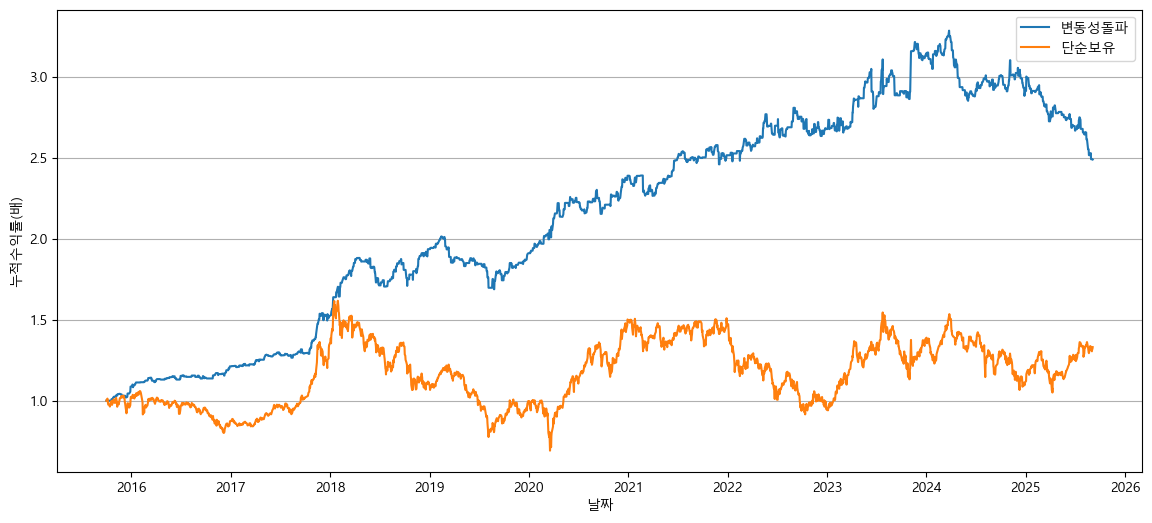

In [12]:
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="변동성돌파")
ax.plot(df['종가'] / df['종가'].iloc[0], label="단순보유")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [13]:
df['전고점'] = df['누적수익률'].cummax()
df['DD'] = (1 - df['누적수익률'] / df['전고점']) * 100
df.tail()

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률,전고점,DD
날짜,,,,,,,,,,,,,
2025-08-29,13390,13470,13220,13260,7213927,-0.562430,250,140.0,13460.0,0.985141,2.490600,3.284618,24.173833
2025-09-01,13235,13330,13060,13135,6022690,-0.942685,270,250.0,13360.0,1.000000,2.490600,3.284618,24.173833
2025-09-02,13205,13295,13085,13270,6159614,1.027788,210,270.0,13340.0,1.000000,2.490600,3.284618,24.173833
2025-09-03,13235,13295,13120,13285,7711656,0.113037,175,210.0,13340.0,1.000000,2.490600,3.284618,24.173833
2025-09-04,13315,13460,13295,13395,3648009,0.828002,165,175.0,13402.5,0.999440,2.489207,3.284618,24.216265


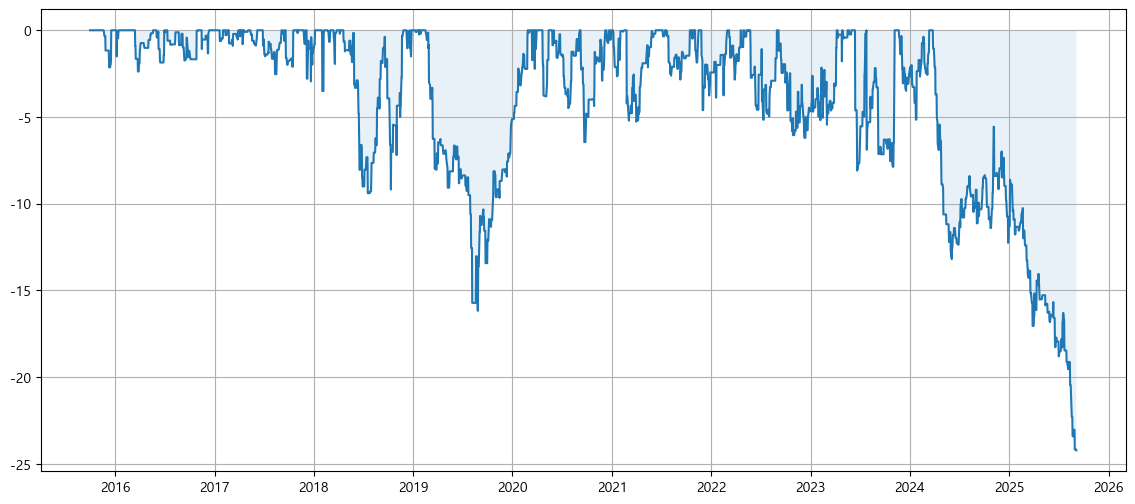

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1)
ax.fill_between(df.index, df['DD'] * -1, alpha=0.1)
ax.grid()
plt.show()

In [15]:
df['DD'].max()

np.float64(24.21626517182024)

In [16]:
df['MA10'] = df['종가'].rolling(window=10).mean()
df.head(n=10)

,시가,고가,저가,종가,거래량,등락률,변동,전일변동,목표가,수익률,누적수익률,전고점,DD,MA10
날짜,,,,,,,,,,,,,,
2015-10-01,10125,10125,10059,10066,31742,NaN,66,NaN,NaN,1.0,1.0,1.0,0.0,NaN
2015-10-02,10100,10123,10100,10113,63440,0.466918,23,66.0,10133.0,1.0,1.0,1.0,0.0,NaN
2015-10-05,10219,10229,10175,10196,43301,0.820726,54,23.0,10230.5,1.0,1.0,1.0,0.0,NaN
2015-10-06,10212,10238,10137,10141,42543,-0.539427,101,54.0,10239.0,1.0,1.0,1.0,0.0,NaN
2015-10-07,10059,10059,9913,9915,21396,-2.228577,146,101.0,10109.5,1.0,1.0,1.0,0.0,NaN
2015-10-08,9969,9987,9752,9823,42342,-0.927887,235,146.0,10042.0,1.0,1.0,1.0,0.0,NaN
2015-10-12,9818,9818,9790,9798,42351,-0.254505,28,235.0,9935.5,1.0,1.0,1.0,0.0,NaN
2015-10-13,9834,9834,9744,9747,21160,-0.520514,90,28.0,9848.0,1.0,1.0,1.0,0.0,NaN
2015-10-14,9738,9769,9697,9700,23397,-0.482200,72,90.0,9783.0,1.0,1.0,1.0,0.0,NaN


In [17]:
df['매매신호'] = df['시가'] > df['MA10'].shift(1)   # 당일 시가 > 전일 종가까지로 계산된 10일 이동평균

In [18]:
df['수익률2'] = np.where((df['매매신호'] == 1) & (df['고가'] >= df['목표가']), 
                        df['종가'] / df['목표가'], 
                        1)

In [19]:
df['누적수익률2'] = df['수익률2'].cumprod()

In [20]:
df['누적수익률2'].iloc[-1]

np.float64(1.3847754634158183)

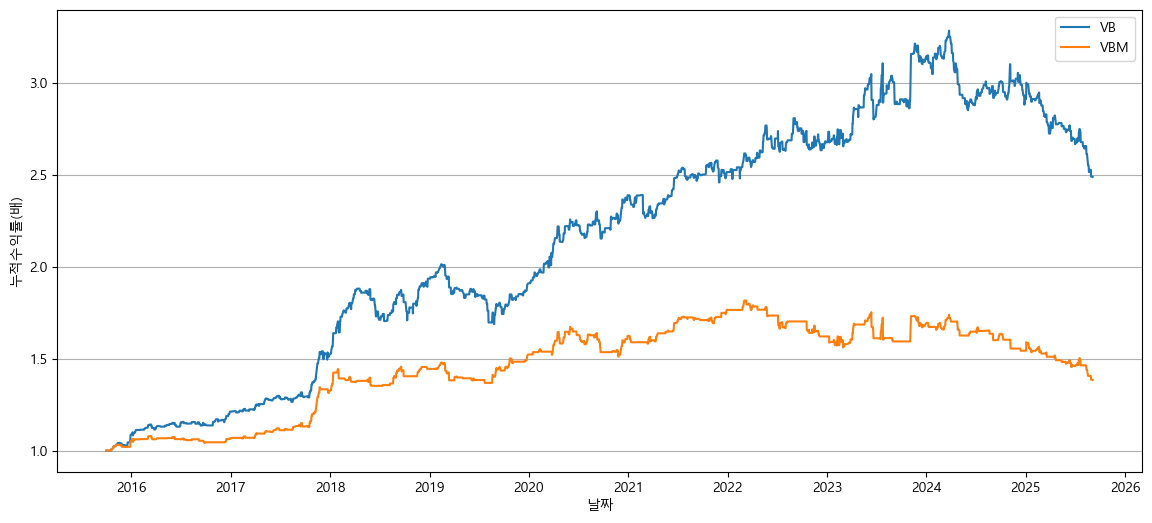

In [21]:
import matplotlib.pyplot as plt
import platform

# 한글 처리 
if platform.system() == 'Darwin':
    plt.rc('font', family='AppleGothic') 
else:
    plt.rc('font', family='Malgun Gothic')

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df['누적수익률'], label="VB")
ax.plot(df['누적수익률2'], label="VBM")

plt.xlabel('날짜')
plt.ylabel('누적수익률(배)')
plt.grid(True, axis='y')
plt.legend()
plt.show()

In [22]:
df['전고점2'] = df['누적수익률2'].cummax()
df['DD2'] = (1 - df['누적수익률2'] / df['전고점2']) * 100

In [23]:
df['DD2'].max()

np.float64(23.775848218434316)

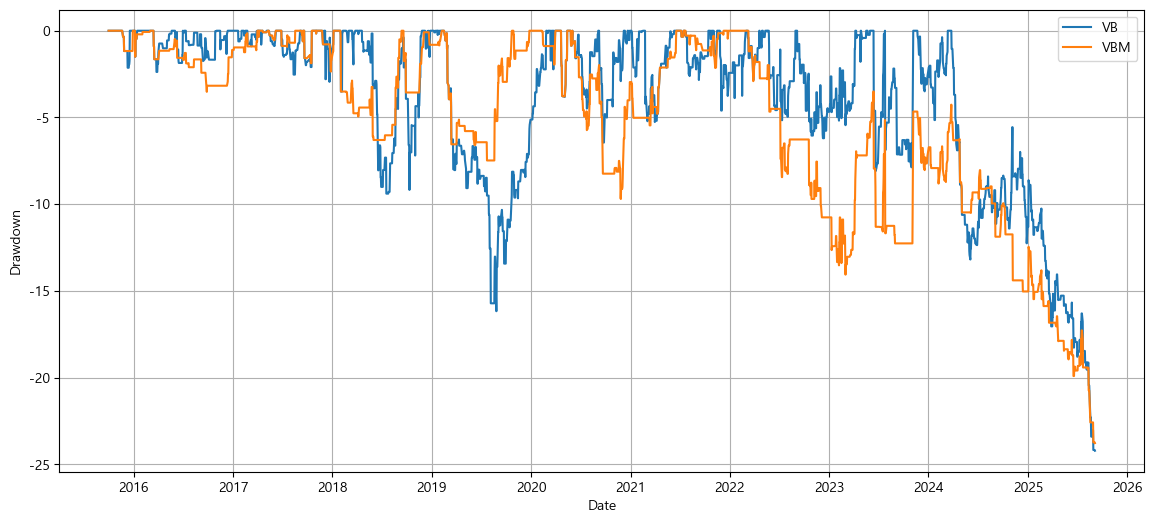

In [24]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)

ax.plot(df.index, df['DD'] * -1, label='VB')
ax.plot(df.index, df['DD2'] * -1, label='VBM')

ax.grid()
plt.xlabel("Date")
plt.ylabel("Drawdown")
plt.legend(loc='best')
plt.show()

pykrx OK: (2438, 6)
VB 누적수익률(배): 2.4892065093289215
VB CAGR(%): 9.61455879376809
Buy&Hold(배): 1.330717266044109
VB MDD(%): 24.21626517182024
VBM 누적(배): 1.3847754634158183  | MDD2(%): 23.775848218434316


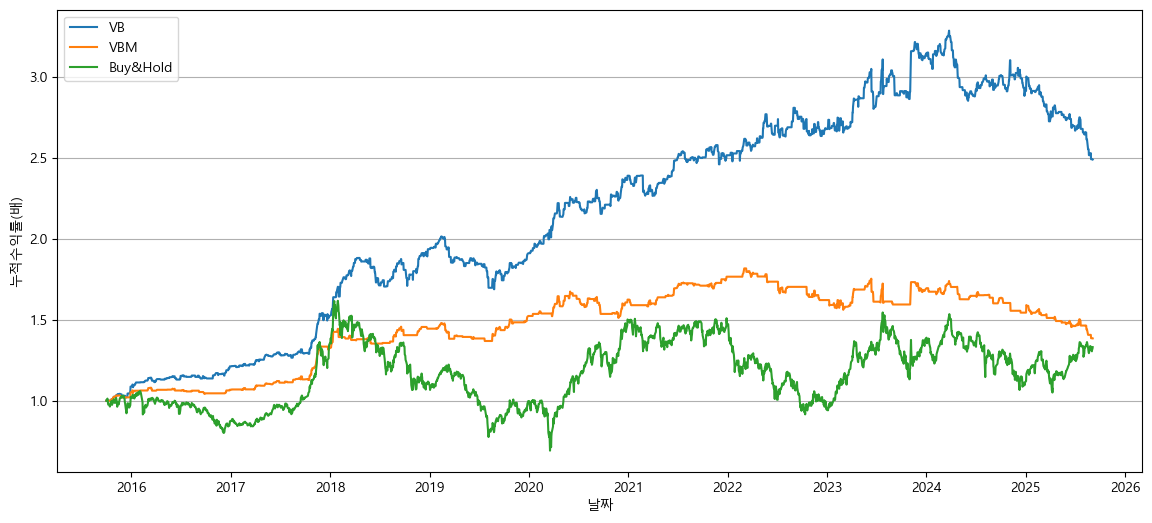

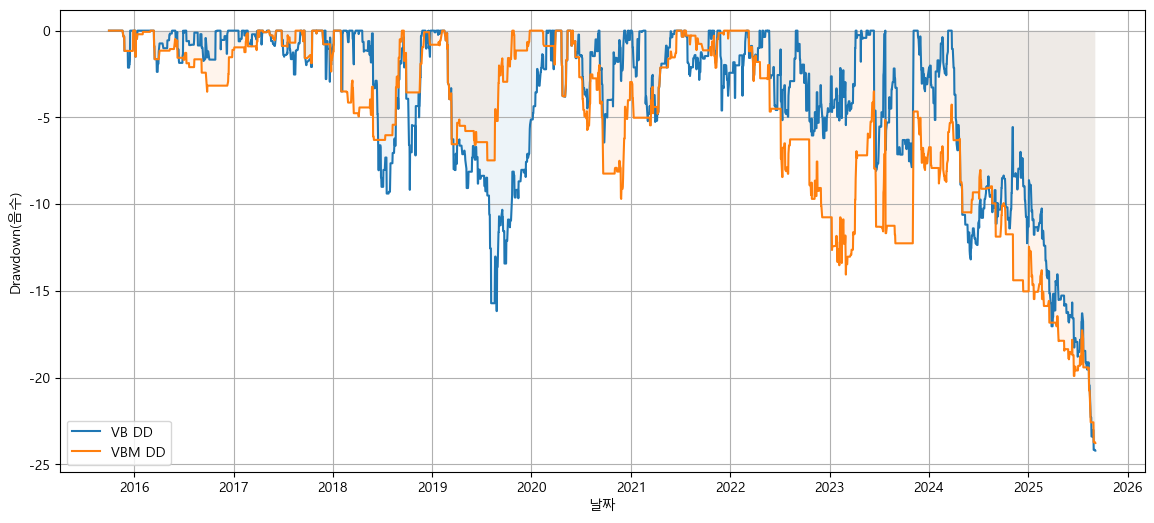

In [25]:
# =========================================
# 0) 데이터 준비: pykrx에서 229200(코스닥150 ETF) 불러오기
#    - 안 되면 샘플 데이터로 대체
# =========================================
import pandas as pd
import numpy as np
import datetime as dt

start = "20151001"  # 상장 초기 구간부터
today = dt.datetime.now().strftime("%Y%m%d")

try:
    from pykrx import stock
    df = stock.get_market_ohlcv_by_date(start, today, "229200")  # 날짜 인덱스, 컬럼: 시가/고가/저가/종가/거래량 등
    df.index.name = "날짜"
    print("pykrx OK:", df.shape)
except Exception as e:
    print("⚠️ pykrx 사용 불가 → 샘플 데이터 생성:", e)
    # 샘플(교육용): 랜덤 워크로 OHLCV 생성
    dates = pd.bdate_range("2015-10-01", periods=2200)  # 영업일 기준
    close = 10000 * (1 + np.random.normal(0, 0.01, len(dates))).cumprod()
    open_ = np.r_[close[0], close[:-1]] * (1 + np.random.normal(0, 0.001, len(dates)))
    high  = np.maximum(open_, close) * (1 + np.random.uniform(0, 0.01, len(dates)))
    low   = np.minimum(open_, close) * (1 - np.random.uniform(0, 0.01, len(dates)))
    vol   = np.random.randint(1_000, 50_000, len(dates))
    df = pd.DataFrame({"시가":open_, "고가":high, "저가":low, "종가":close, "거래량":vol}, index=dates)
    df.index.name = "날짜"

# =========================================
# 1) 기본 변동성 돌파 전략 (VB)
#    - 전일 변동폭 = (고가-저가)
#    - 목표가 = 시가 + k * 전일변동
#    - 당일 고가가 목표가 이상이면 종가 체결, 아니면 미진입(수익률=1)
# =========================================
k = 0.5  # 돌파 계수(하이퍼파라미터)

# TODO 1-1: 전일 변동폭 계산
df["변동"] = df["고가"] - df['저가']
df["전일변동"] = df['변동'].shift(1)

# TODO 1-2: 목표가 계산
df["목표가"] = df['시가'] + df['전일변동'] * 0.5

# TODO 1-3: 수익률(진입 조건: 고가 >= 목표가 → 종가/목표가, 아니면 1)
df["수익률"] = np.where(df['고가'] >= df["목표가"], df['종가'] / df['목표가'], 1)

# TODO 1-4: 누적수익률
df["누적수익률"] = df['수익률'].cumprod()

# TODO 1-5: CAGR (연복리)
days = (df.index[-1] - df.index[0]).days
years = days / 365
CAGR = df['누적수익률'].iloc[-1] ** (1/ years) -1 
print("VB 누적수익률(배):", df["누적수익률"].iloc[-1])
print("VB CAGR(%):", CAGR * 100)

# TODO 1-6: 단순보유(종가/첫 종가)와 비교
df["단순보유"] = df['종가'] / df['종가'].iloc[0]
print("Buy&Hold(배):", df["단순보유"].iloc[-1])

# =========================================
# 2) MDD(최대낙폭) 계산 및 시각화용 데이터
# =========================================
# TODO 2-1: 전고점(누적수익률 기준) / DD(%)
df["전고점"] = df['누적수익률'].cummax()
df["DD"] = (1 - df['누적수익률']/ df['전고점']) * 100
print("VB MDD(%):", df["DD"].max())

# =========================================
# 3) 필터 추가 버전 (VBM): MA10 필터
#    - 매매신호 = 당일 시가 > 전일 MA10 → 그날만 돌파 신호 유효
# =========================================
# TODO 3-1: MA10, 매매신호
df["MA10"] = df['종가'].rolling(window=10).mean()
df["매매신호"] = df['시가'] > df['MA10'].shift(1)

# TODO 3-2: 조건부 수익률2, 누적수익률2
df["수익률2"] = np.where((df['매매신호'] == 1) & (df['고가'] >= df['목표가']), df['종가'] /df['목표가'], 1)
df["누적수익률2"] = df['수익률2'].cumprod()

# TODO 3-3: DD2 / MDD2
df["전고점2"] = df['누적수익률2'].cummax()
df["DD2"] = (1 - df['누적수익률2'] / df['전고점2']) * 100
print("VBM 누적(배):", df["누적수익률2"].iloc[-1], " | MDD2(%):", df["DD2"].max())

# =========================================
# 4) 시각화 (원하는 경우 실행)
# =========================================
import matplotlib.pyplot as plt
import platform
if platform.system() == "Darwin":
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

# TODO 4-1: 누적수익률 비교
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(df["누적수익률"], label="VB")
ax.plot(df["누적수익률2"], label="VBM")
ax.plot(df["단순보유"], label="Buy&Hold")
ax.set_xlabel("날짜"); ax.set_ylabel("누적수익률(배)")
ax.grid(True, axis="y"); ax.legend()
plt.show()

# TODO 4-2: 드로다운 비교
fig = plt.figure(figsize=(14, 6))
ax = fig.add_subplot(1, 1, 1)
ax.plot(-df["DD"], label="VB DD")
ax.plot(-df["DD2"], label="VBM DD")
ax.fill_between(df.index, -df["DD"], alpha=0.08)
ax.fill_between(df.index, -df["DD2"], alpha=0.08)
ax.set_xlabel("날짜"); ax.set_ylabel("Drawdown(음수)")
ax.grid(True); ax.legend()
plt.show()


코스피,시가,고가,저가,종가,거래량,거래대금,상장시가총액
날짜,,,,,,,
2010-01-04,1681.71,1696.14,1681.71,1696.14,296547959,4364595613797,894731590862430
2010-01-05,1701.62,1702.39,1686.45,1690.62,408854057,6830723338336,891901043372630
2010-01-06,1697.88,1706.89,1696.10,1705.32,426040121,6391016648164,899645119495585
2010-01-07,1702.92,1707.90,1683.45,1683.45,462402742,7498405146704,888111373913575
2010-01-08,1694.06,1695.26,1668.84,1695.26,379952313,6965072761490,894080129850645
...,...,...,...,...,...,...,...
2024-12-23,2423.36,2446.97,2413.62,2442.01,428166806,7375539570358,1998047401443676
2024-12-24,2450.55,2452.85,2432.42,2440.52,386777917,6740790173171,1997825853682133
2024-12-26,2449.52,2449.52,2428.82,2429.67,322800054,6410407187557,1989005161072953


,NAV,시가,고가,저가,종가,거래량,거래대금,기초지수
날짜,,,,,,,,
2015-10-01,10785.03,10830,10830,10760,10760,30032,324196640,1078.56
2015-10-02,10800.11,10800,10825,10800,10810,60029,649813450,1080.09
2015-10-05,10874.01,10930,10940,10880,10900,40976,447371305,1088.32
2015-10-06,10840.05,10920,10950,10840,10840,40252,437046835,1084.94
2015-10-07,10613.21,10760,10760,10600,10600,20248,216390125,1062.22
...,...,...,...,...,...,...,...,...
2024-12-23,11146.39,11110,11285,11000,11155,14527835,161926310370,1114.84
2024-12-24,11229.76,11205,11270,11135,11225,6202421,69561556590,1123.24
2024-12-26,11179.24,11300,11300,11135,11180,8372497,93818886805,1118.14


할로윈 전략 최종 배수: 1.9964285273674918
KOSPI 단순보유 최종 배수: 1.4146768545049335
변동성 돌파 최종 배수: 0.8893122939355007
ETF 단순보유 최종 배수: 1.0478624535316028


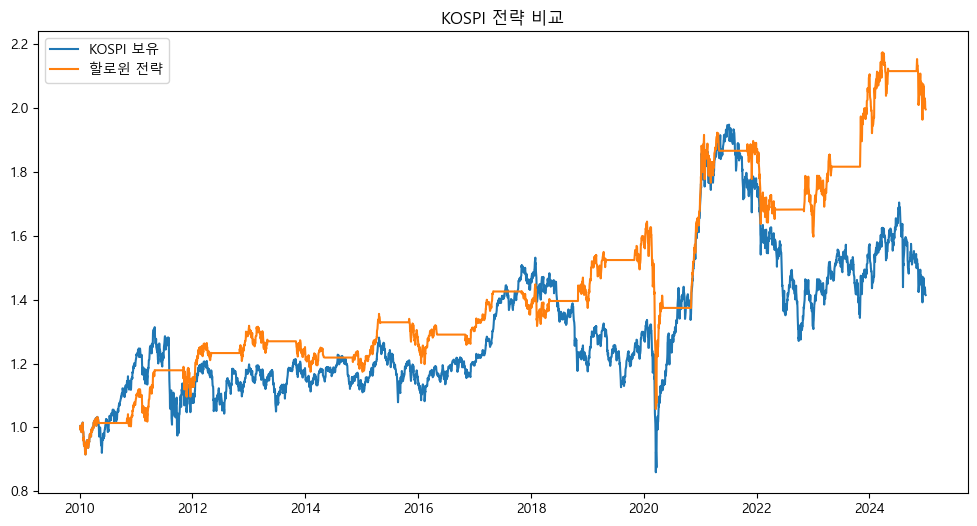

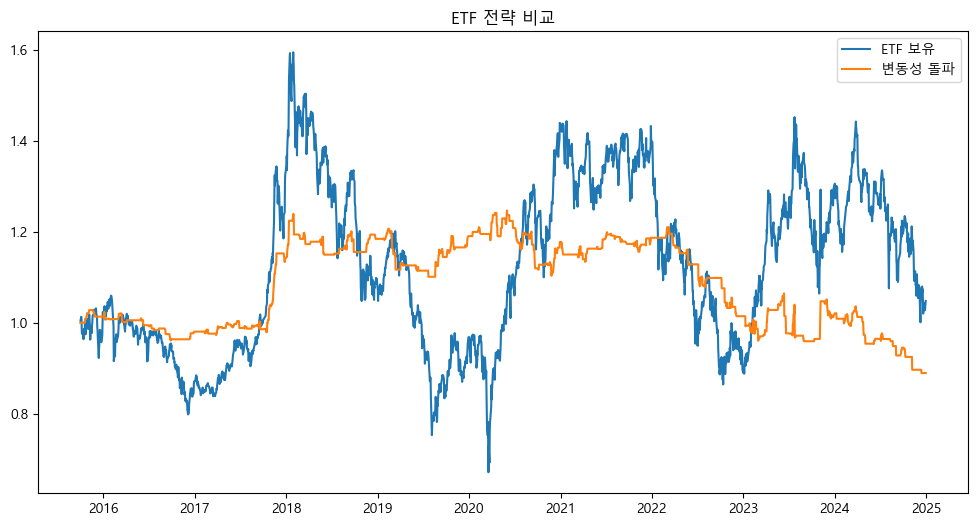


[성과 요약]
             전략       CAGR(%)  MDD(%)  연변동성(%)  승률(%)
0   할로윈(KOSPI)  4.830000e+00  -35.71    11.95   26.5
1     KOSPI 보유  2.390000e+00  -43.90    16.75   52.4
2  변동성 돌파(ETF)  1.469171e+10 -100.00   147.50   71.2
3       ETF 보유  5.200000e-01  -57.93    27.47   51.3


In [32]:
# =========================================
# 할로윈 전략 vs 변동성 돌파 전략
# - 기초 개념: 일간 수익률, 이동평균, 조건 신호, 누적수익률
# - 룩어헤드 방지: 신호(또는 보유 여부)는 '다음날' 수익에 적용
# - 비용 단순화: 리밸런싱/진입 첫 날에만 거래비용 차감(옵션)
# =========================================
from pykrx import stock
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import platform

plt.rc('font', family='Malgun Gothic' if platform.system() != 'Darwin' else 'AppleGothic')

# -----------------------------------------
# 0) 공통 설정
# -----------------------------------------
start, end = "2010-01-01", "2024-12-31"  # 기간은 자유롭게 조정
fee = 0.0005      # (선택) 거래비용 비율, 예: 0.05%

# 대상 자산
ticker_idx = "1001"   # KOSPI 지수 (할로윈 전략용)
ticker_etf = '229200' # KODEX 코스닥150 (변동성 돌파용)

# -----------------------------------------
# 1) 데이터 로드
# -----------------------------------------
# TODO 1-1) KOSPI 지수 일봉(OHLCV)을 불러와 df_idx에 저장하세요.
df_idx = stock.get_index_ohlcv(start, end, ticker_idx)
df_idx.index = pd.to_datetime(df_idx.index)
# TODO 1-2) 229200(ETF) 일봉(OHLCV)을 불러와 df_etf에 저장하세요.
df_etf = stock.get_etf_ohlcv_by_date(start, end, ticker_etf)
df_etf.index = pd.to_datetime(df_etf.index)


# 정렬
df_idx = df_idx.sort_index()
df_etf = df_etf.sort_index()

display(df_idx)
display(df_etf)
# -----------------------------------------
# 2) 공통: 일간 수익률 계산
# -----------------------------------------
df_idx["ret"] = df_idx["종가"].pct_change()
df_etf["ret"] = df_etf["종가"].pct_change()

# -----------------------------------------
# 3) 할로윈 전략 (10/11~4월 보유)
# -----------------------------------------
# 아이디어: 11,12,1,2,3,4월에는 '보유', 그 외(5~10월)는 '현금'
# 룩어헤드 방지: 오늘의 보유여부로 오늘 수익을 계산하면 과대평가 → '내일' 수익에 적용
months_active = {11,12,1,2,3,4}
df_idx["hold_hw"] = df_idx.index.month.isin(months_active).astype(int)
df_idx["hold_hw_shift"] = df_idx["hold_hw"].shift(1).fillna(0)

# TODO 3-1) 전략 수익률(strategy_ret_hw)을 만들어보세요.
strategy_ret_hw = df_idx["ret"] * df_idx["hold_hw_shift"]
df_idx["strat_hw"] = strategy_ret_hw

# (선택) 월 경계에서 포지션이 바뀌는 첫 날 거래비용 차감
# TODO 3-2) 포지션 변동량을 구해 turnover 비용을 첫 날에 반영하세요.
df_idx["turnover"] = df_idx["hold_hw_shift"].diff().abs().fillna(0)
df_idx.loc[df_idx["turnover"]>0, "strat_hw"] -= fee


# -----------------------------------------
# 4) 변동성 돌파 전략 (종목 변경)
# -----------------------------------------
K = 0.5

# 필터(선택): 10일 이동평균 위에서만 시도
df_etf["range"] = df_etf["고가"].shift(1) - df_etf["저가"].shift(1)
df_etf["target"] = df_etf["시가"] + df_etf["range"]*K

df_etf["ma10"] = df_etf["종가"].rolling(10).mean()
filter = df_etf["시가"] > df_etf["ma10"]

# TODO 4-1) 돌파 조건 cond 만들기: (고가 >= target) & filt
cond = (df_etf["고가"] >= df_etf["target"]) & filter
# TODO 4-2) 체결가(보수적): target * (1 + 슬리피지). 여기선 슬리피지 0 가정
fill_price = df_etf["target"] 
# TODO 4-3) 당일 단타 수익률(돌파 시): 종가 / 체결가, 아니면 1
ret_day = np.where(cond, df_etf["종가"]/fill_price - 1, 0)
# TODO 4-4) 거래비용: 거래가 발생한 날(돌파일) 수익에서 fee 차감
ret_day = np.where(cond, ret_day - fee, ret_day)
df_etf["strat_vb"] = (1+ret_day).cumprod()

# -----------------------------------------
# 5) 벤치마크(단순보유) 대비 보기
# -----------------------------------------


print("할로윈 전략 최종 배수:", (1+df_idx["strat_hw"]).cumprod().iloc[-1])
print("KOSPI 단순보유 최종 배수:", (1+df_idx["ret"]).cumprod().iloc[-1])

print("변동성 돌파 최종 배수:", df_etf["strat_vb"].iloc[-1])
print("ETF 단순보유 최종 배수:", (1+df_etf["ret"]).cumprod().iloc[-1])

# -----------------------------------------
# 6) 시각화
# -----------------------------------------
plt.figure(figsize=(12,6))
plt.plot((1+df_idx["ret"]).cumprod(), label="KOSPI 보유")
plt.plot((1+df_idx["strat_hw"]).cumprod(), label="할로윈 전략")
plt.legend(); plt.title("KOSPI 전략 비교")
plt.show()

plt.figure(figsize=(12,6))
plt.plot((1+df_etf["ret"]).cumprod(), label="ETF 보유")
plt.plot(df_etf["strat_vb"], label="변동성 돌파")
plt.legend(); plt.title("ETF 전략 비교")
plt.show()

# -----------------------------------------
# 7) (선택) 간단 성과지표 함수 + 비교표
# -----------------------------------------
def perf(ret, name=""):
    """ret: 일간 전략 수익률(곱연산용은 1+ret 형태가 아님)."""
    ret = pd.Series(ret).dropna()
    cum = (1 + ret).cumprod()
    days = len(ret)
    years = days / 252
    # TODO 7-1) CAGR, MDD, 연변동성, 승률을 계산해 dict로 반환해보세요.
    CAGR = cum.iloc[-1]**(1/years) - 1
    # MDD
    dd = cum / cum.cummax() - 1
    MDD = dd.min()
    # 변동성
    VOL = ret.std() * np.sqrt(252)
    # 승률
    WIN = (ret > 0).mean()
    return {"전략": name, "CAGR(%)": round(CAGR*100,2), "MDD(%)": round(MDD*100,2),
            "연변동성(%)": round(VOL*100,2), "승률(%)": round(WIN*100,1)}

summary = pd.DataFrame([
    perf(df_idx["strat_hw"], "할로윈(KOSPI)"),
    perf(df_idx["ret"], "KOSPI 보유"),
    perf(df_etf["strat_vb"]-1, "변동성 돌파(ETF)"),   # strat_vb는 배율 → -1로 일간 수익률화
    perf(df_etf["ret"], "ETF 보유")
])
print("\n[성과 요약]\n", summary)
